In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import math
_ = plt.set_cmap("gray")

<Figure size 432x288 with 0 Axes>

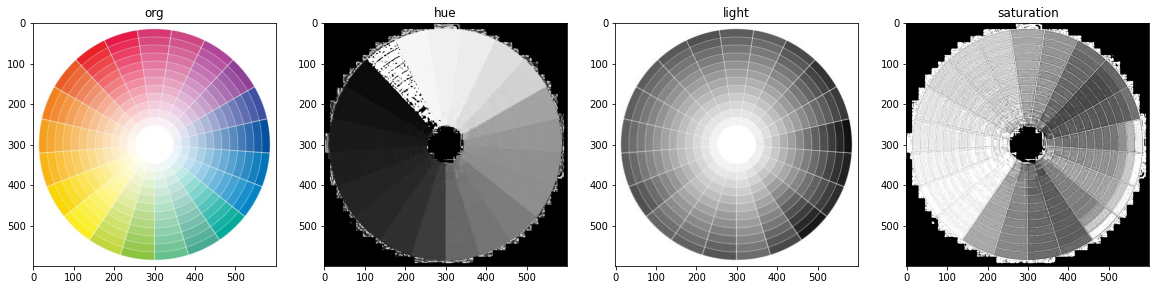

In [3]:
# %matplotlib tk
img = cv.imread("./img/color-wheel-full.jpg")
hsv = cv.cvtColor(img, cv.COLOR_BGR2HLS)

fig, ax = plt.subplots(1,4)

fig.set_size_inches(20,6)

for ix, title in enumerate(["org", "hue", "light", "saturation"]):
    ax[ix].set_title(title)

ax[0].imshow(img[:,:,::-1])


ax[1].imshow(hsv[:,:,0])
ax[2].imshow(hsv[:,:,1])
ax[3].imshow(hsv[:,:,2])


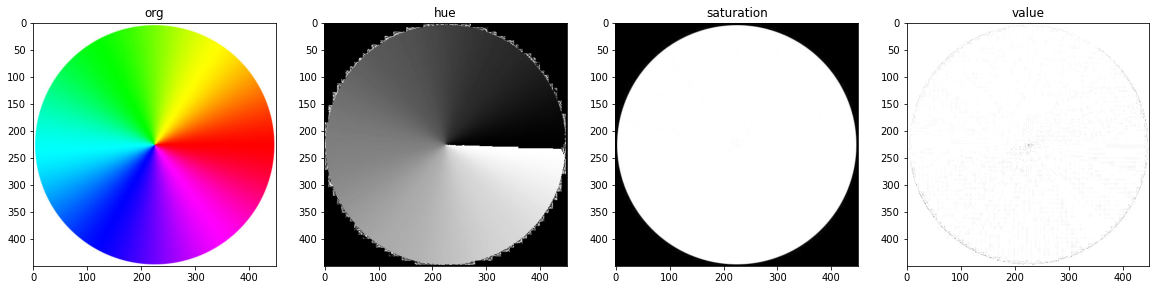

In [4]:
img = cv.imread("./img/color-wheel.jpg")
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

fig, ax = plt.subplots(1,4)

for ix, title in enumerate(["org", "hue", "saturation", "value"]):
    ax[ix].set_title(title)

fig.set_size_inches(20,6)

ax[0].imshow(img[:,:,::-1])

ax[1].imshow(hsv[:,:,0])
ax[2].imshow(hsv[:,:,1])
ax[3].imshow(hsv[:,:,2])

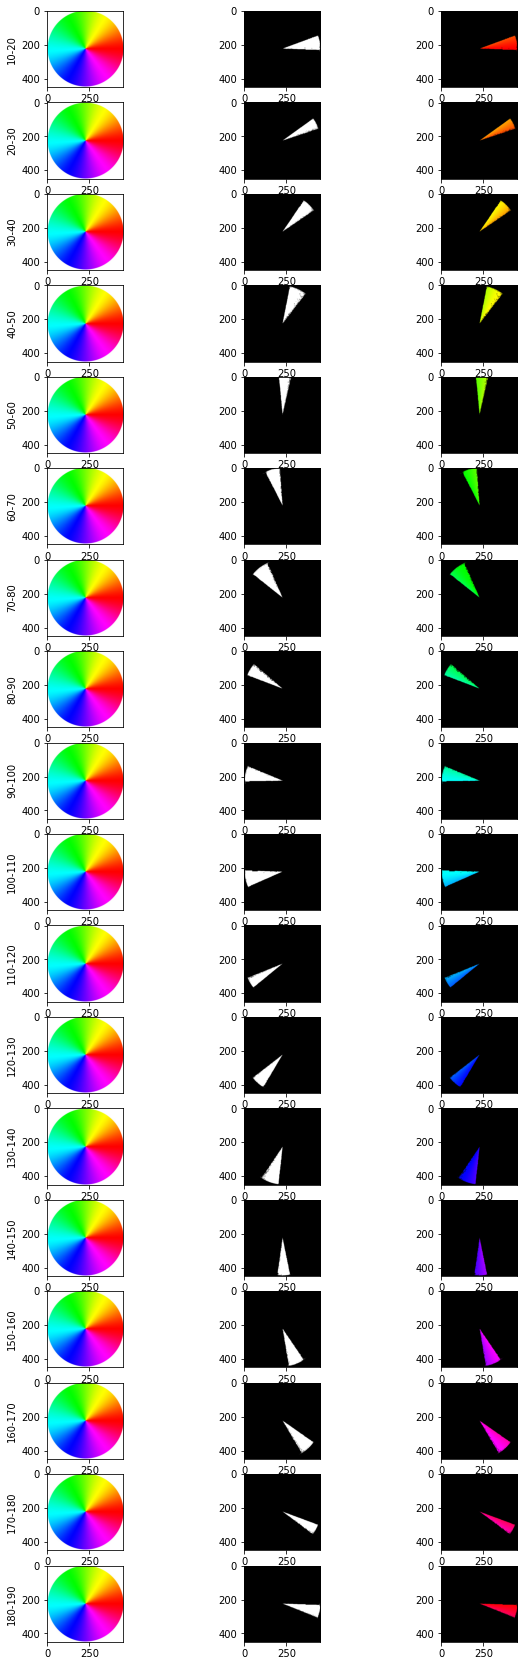

In [10]:
hue = hsv[:,:,0]
sat = hsv[:,:,1]
rgb_img = img[:,:,::-1]

fig, axies = plt.subplots(18, 3)
fig.set_size_inches(10, 30)

hue_value = 0
for ax_col in axies:
    hue_value += 10
    mask = cv.inRange((hue-hue_value) & sat, 245, 245 + 20)
    ax_col[0].imshow(rgb_img)
    ax_col[1].imshow(mask)
    ax_col[2].imshow(cv.bitwise_and(rgb_img, rgb_img, mask=mask))
    ax_col[0].set_ylabel(f"{hue_value}-{hue_value+10}")


In [11]:
def render_with_mask(frame, mask_frame, lower=10, upper=20):
    mask = cv.inRange(mask_frame, lower, upper)
    new_img = cv.bitwise_and(frame, frame, mask=mask)
    
    return new_img

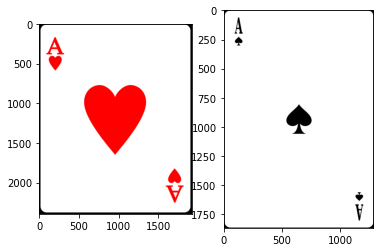

In [13]:
pc_heartA = cv.imread("./img/playing_card_heart_A.png")
pc_spadesA = cv.imread("./img/playing_card_spades_A.png")
fig, ax = plt.subplots(1,2)
ax[0].imshow(pc_heartA[:,:,::-1])
ax[1].imshow(pc_spadesA[:,:,::-1])

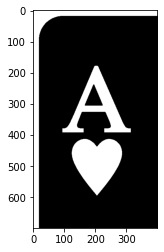

In [14]:
## Hearts
gray = cv.cvtColor(pc_heartA, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (5,5), 1)
_, bw = cv.threshold(gray, 100, 255, cv.THRESH_BINARY_INV)
plt.imshow(bw[0:700, 0:400], cmap="gray")
# bw

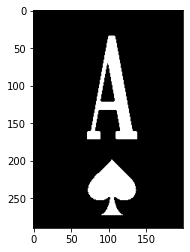

In [15]:
## Spades
gray = cv.cvtColor(pc_spadesA, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (3,3), 1)
_, bw = cv.threshold(gray, 100, 255, cv.THRESH_BINARY_INV)

plt.imshow(bw[30:320,20:220])
# plt.imshow(hsv[:,:, 2])

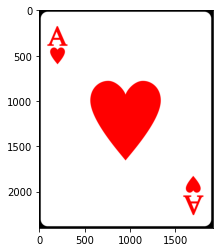

In [17]:
# BGR
allblues = pc_heartA[:,:,0]
allgreens = pc_heartA[:,:,1]
allreds = pc_heartA[:,:,2]

plt.imshow(pc_heartA[:,:,::-1])

In [19]:
def draw_hist(image):
    fig, ax = plt.subplots(2, 3, sharey="row")
    fig.set_size_inches((20, 6))

    for ix, color in enumerate(["Blue", "Green", "Red"]):
        _ = ax[0, ix].set_title(color)
        _ = ax[0, ix].grid()
        _ = ax[0, ix].hist(image[:, :, ix].flatten())
        _ = ax[1, ix].imshow(image[:, :, ix])


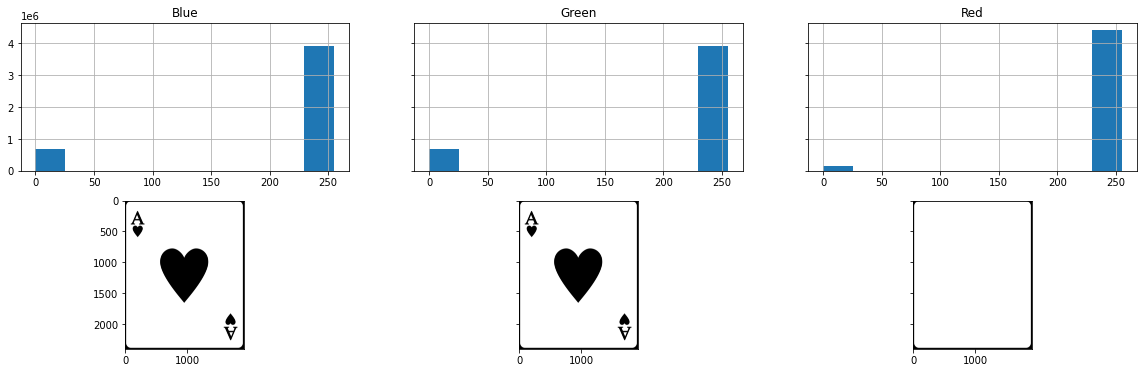

In [20]:
draw_hist(pc_heartA)


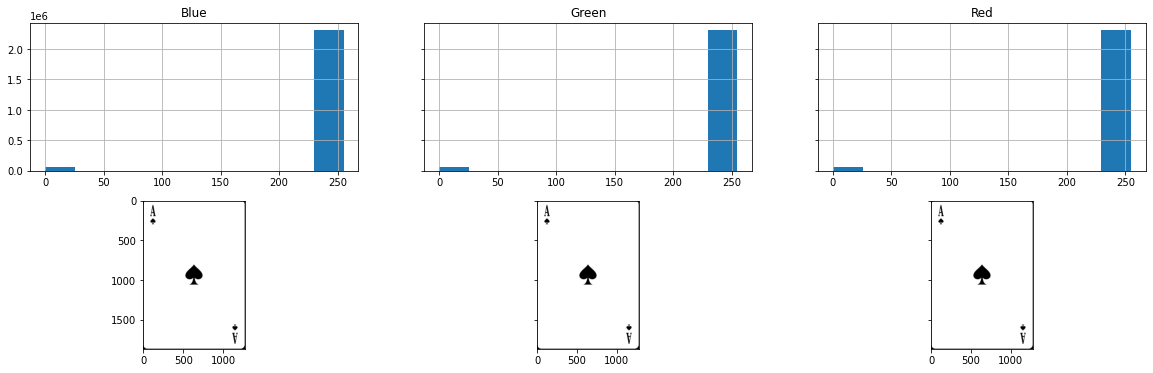

In [21]:
draw_hist(pc_spadesA)

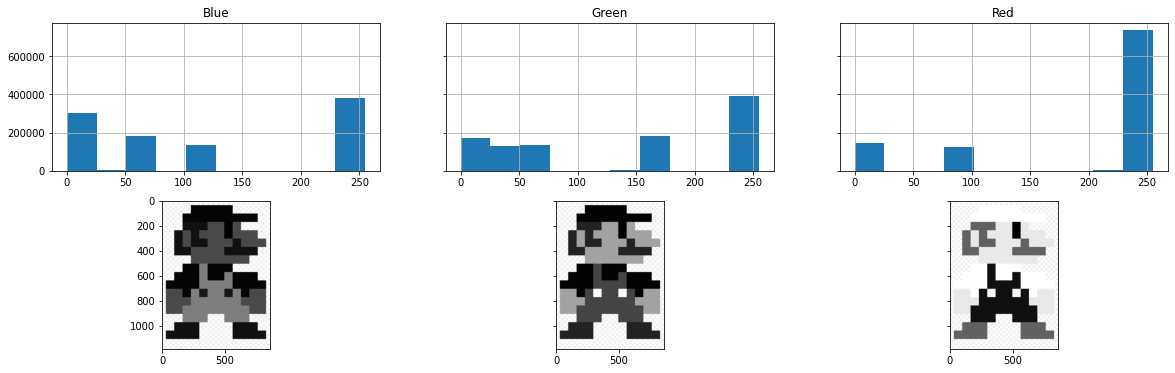

In [22]:
mario = cv.imread("./img/Mario8bit.png")
mario = cv.cvtColor(mario, cv.COLOR_BGRA2BGR)
draw_hist(mario)

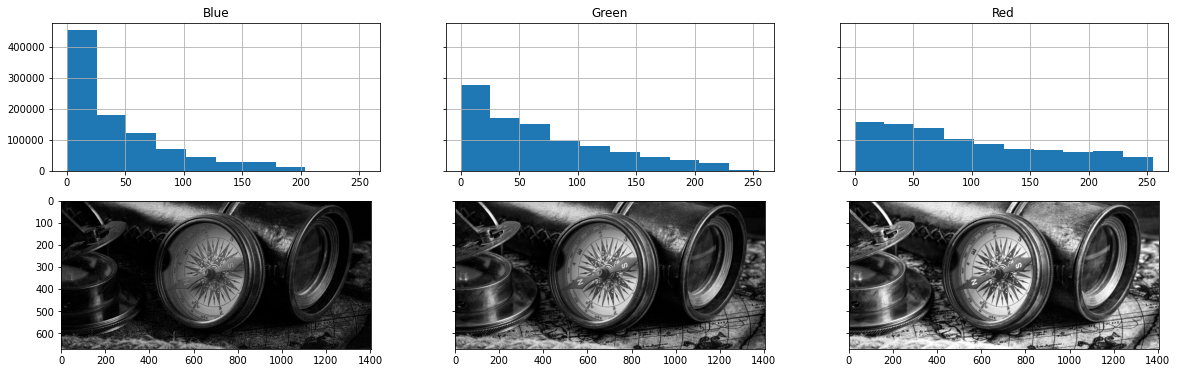

In [23]:
mario = cv.imread("./img/old-vinteage-compass.jpg")
draw_hist(mario)
# mario

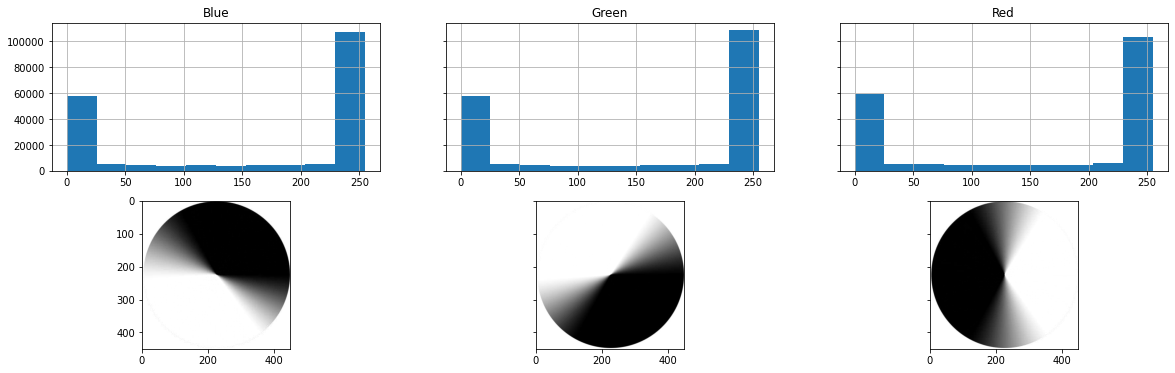

In [24]:
img = cv.imread("./img/color-wheel.jpg")
draw_hist(img)

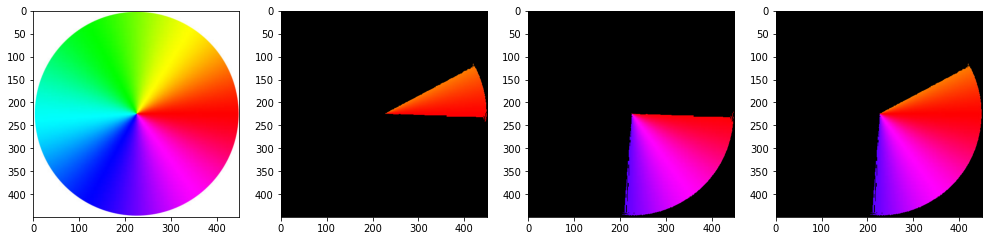

In [29]:
img = cv.imread("./img/color-wheel.jpg")
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
hue = hsv[:, :, 0]
sat = hsv[:, :, 1]

start = 15
_, th0 = cv.threshold((hue - start) & sat, 170, 1, cv.THRESH_BINARY)
_, th1 = cv.threshold((hue - start + 55) & sat, 170, 1, cv.THRESH_BINARY)


fig, ax = plt.subplots(1, 4)

fig.set_size_inches(17, 12)

ax[0].imshow(rgb)
ax[1].imshow(cv.bitwise_and(rgb, rgb, mask=th0))
ax[2].imshow(cv.bitwise_and(rgb, rgb, mask=th1))
ax[3].imshow(cv.bitwise_and(rgb, rgb, mask=(th1 | th0)))
